In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Временные ряды

## Где используются?

- Предсказание цен и объемов продаж на биржах
- Предсказание финансовых и экономических показателей
- Предсказание погоды
- Предсказание экономических показателей
- Анализ медико-биологических приборов

## Основные компоненты временного ряда

Временной ряд - набор значений $Y_t$, причем интервал $Δt=const$

Тренд ($Т$) - компонента ряда, показывающая влияние долговременных факторов

Цикличность ($С$) - компонента ряда, описывающая длительные периоды спада и подъема, состоит из циклов, меняющихся по амплитуде и протяженности

Сезонность ($S$) - компонента ряда, состоит из повторяющихся циклов

## Моделирование рядов

$Y = T + C + S + e$ - аддитивная модель

$Y = T * C * S * e$ - мультипликативная модель

От второго можно перейти к первому при помощи логарифмирования.

## Стационарность

Стационарность - важное свойство временных рядов. Стационарные ряды очень просто прогнозировать.

Ряд называется стационарным, если его среднее, ковариация и дисперсия не зависят от времени.

Пример:

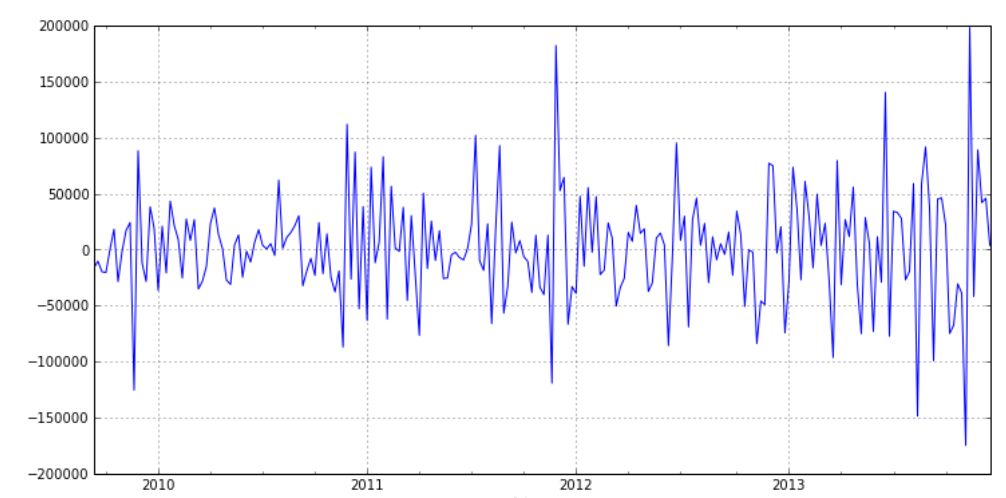

Нестационарные ряды:





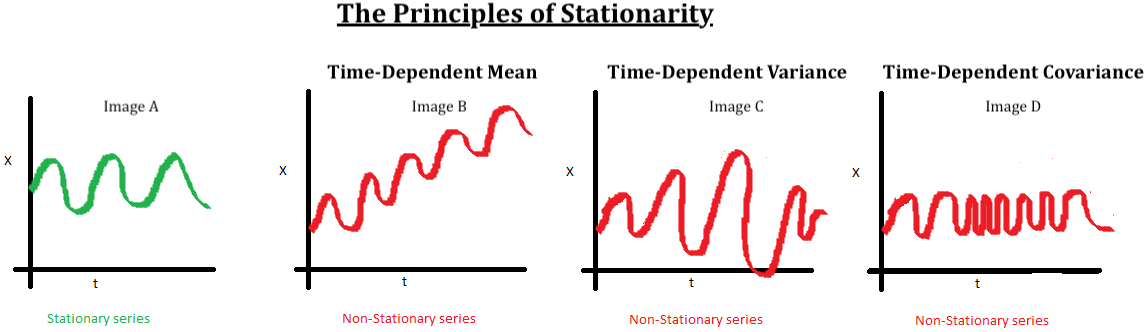

## Стационарен ли ряд с погодой?

Сначала попробуем определить графически

<AxesSubplot:xlabel='Day'>

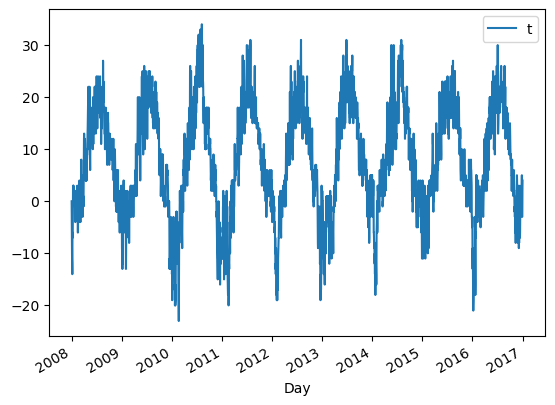

In [2]:
df = pd.read_csv('../data/weather.csv', index_col=0, parse_dates=True)
df.plot()

А если посчитать среднее по месяцам?

In [3]:
df['month'] = df.index.month
df['year'] = df.index.year
df_monthly = df.groupby(['year', 'month']).mean()

<AxesSubplot:xlabel='year,month'>

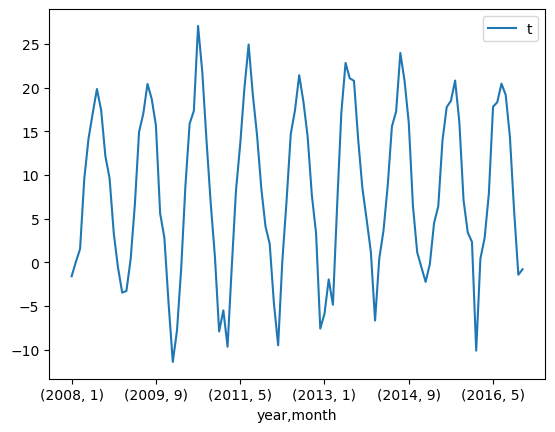

In [4]:
df_monthly.plot()

## Как формально проверять на стационарность?

- Критерий KPSS (Kwiatkowski–Phillips–Schmidt–Shin)
- DF-тест (Dickey — Fuller test)


In [5]:
! pip install statsmodels

In [6]:
import statsmodels.tsa.stattools

У критерия KPSS нулевая гипотеза - ряд стационарен.

<AxesSubplot:xlabel='year,month'>

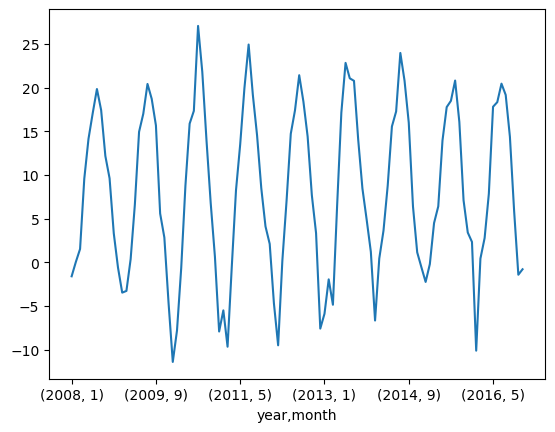

In [7]:
df_monthly['t'].plot()

In [8]:
stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df_monthly['t'])
stat, p_value

/var/folders/0m/83cqwzds7rd6z7tfxp_w6nsm2j0dkz/T/ipykernel_23981/2620650178.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, *_ = statsmodels.tsa.stattools.kpss(df_monthly['t'])


(0.02976111934273086, 0.1)

p-value больше 0.1, нулевая гипотеза не опровергается, ряд стационарен

У теста Дики-Фуллера нулевая гипотеза - ряд нестационарен.

In [9]:
stat, pvalue, *_ = statsmodels.tsa.stattools.adfuller(df_monthly)
stat, pvalue

(-8.615368028158471, 6.311711004709152e-14)

Нулевая гипотеза неверна - ряд стационарен

## Задача

Проверить на стационарность двумя критериями **последний месяц** измерений (по полному датасету)

In [10]:
# Ваш код здесь


## Модель AR

Авторегрессионная модель $AR(p)$ - самая простая модель для предсказания временных рядов.

Построим линейную регрессию на последних $p$ членах ряда:

$Y_t = c + \varepsilon_t + \sum_{i=1}^{p} \alpha_i Y_{t-i}$

$c$ - константа (обычно 0)

$\alpha_i$ - коэффициенты регрессии

$\varepsilon_t$ - случайная ошибка

## Модель MA

Модель скользящего среднего $MA(q)$ (не путать со скользящей средней ряда) работает на основе генерации случайных чисел.

$Y_t = \sum_{i=1}^{q}b_i \varepsilon_{t-i}$

$b_i$ - коэффициенты регрессии

$\varepsilon_t$ - одинаково распределенная случайная величина (остатки модели)

Теорема Вольда доказывает, что моделью $MA(\infty)$ можно предсказать любой стационарный временной ряд.

Но построить такую модель невозможно, поэтому по наперед заданной точности можно подобрать количество параметров $q$, которые будут обеспечивать эту точность.

Чтобы значительно сократить количество параметров, используют модель ARMA.

## Модель ARMA

Модель $ARMA(p, q)$ сочетает в себе модели $AR(p)$ и $MA(q)$:

$Y_t = c + \varepsilon_t + \sum_{i=1}^{p} \alpha_i Y_{t-i} + \sum_{i=1}^{q}b_i \varepsilon_{t-i}$

Моделью ARMA можно прогнозировать любой стационарный процесс с хорошей точностью и довольно небольшими параметрами $p$ и $q$.

## Модель ARIMA

Если ряд нестационарен, то мы можем попытаться свести его к стационарному и применить ARMA.

Есть две основные техники - дифференцирование и логарифмирование.

Модель ARIMA позволяет убирать тренд из ряда при помощи дифференцирования.

У этой модели три гиперпараметра - $p$, $d$ и $q$. 

- $p$ - параметр модели $AR$
- $d$ - количество дифференцирований ряда, определяется подбором
- $q$ - параметр модели $MA$

Качество модели можно измерять при помощи критерия Акаике (AIC). Чем меньше значение, тем лучше, а его абсолютное значение не имеет смысла.

Как определить, что прогноз оптимален? Остатки $y_{pred} - y_{real}$ должны быть распределены нормально.

In [11]:
# Если стоит старый statsmodels, то использовать этот импорт:
# from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.arima.model import ARIMA 

Попробуем перебрать некоторые параметры и определить "на глаз" + по критерию Акаике какая модель лучше

/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/svkov42/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodel

AIC= 661.4383349192242


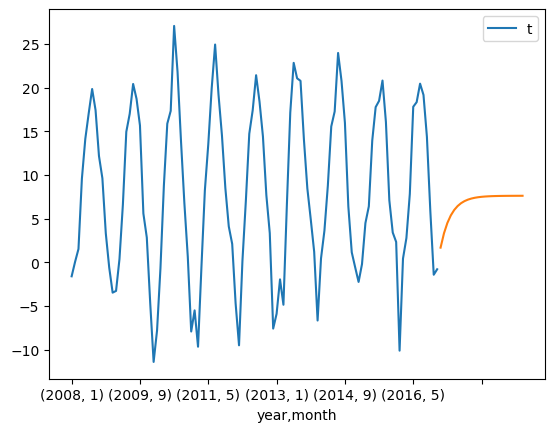

In [12]:
model_fit = ARIMA(df_monthly, order=(1, 0, 1)).fit()
df_monthly.plot()
model_fit.forecast(25).plot()
print('AIC=', model_fit.aic)

## Определяем параметры

Как подобрать оптимальные параметры `p`, `d` и `q`? На самом деле, только перебором, сверяясь с критерием Акаике. 

Но можно сократить перебор, используя графики автокорреляции и частной автокорреляции

На практике брать значения p и q больше 10 не имеет смысла, модель будет считаться очень долго.

In [13]:
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf

<AxesSubplot:xlabel='year,month'>

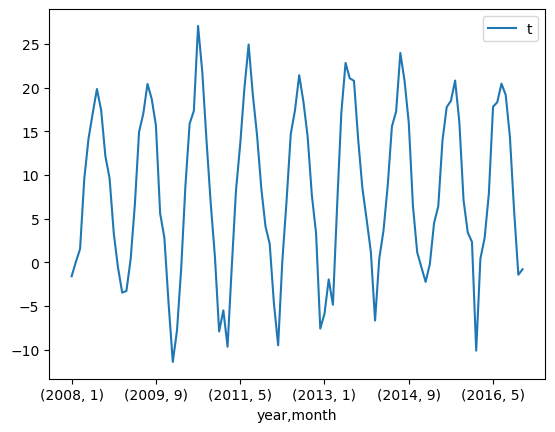

In [14]:
df_monthly.plot()

Все значения ACF вне синей области можно использовать в качестве параметра $p$

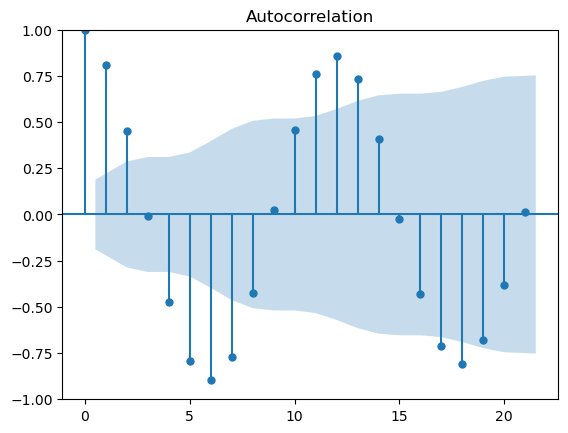

In [15]:
plot_acf(df_monthly)
plt.show()

Все значения PACF вне синей области можно использовать в качестве параметра $q$

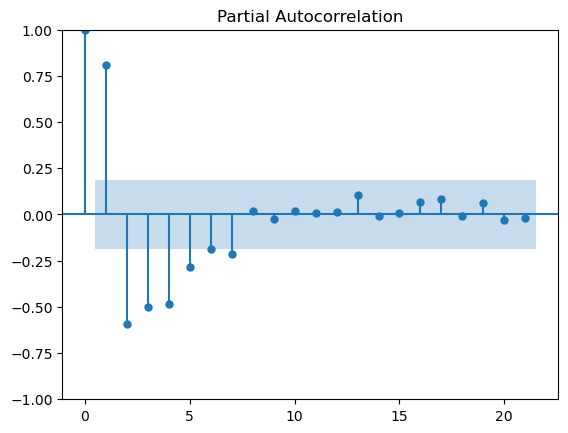

In [16]:
plot_pacf(df_monthly)
plt.show()

## Задача

Найти оптимальные p, q и d (использовать критерий Акаике).

Разбить данные на треин и тест, посчитать МSЕ или MAE, вывести график, на котором отобразить разными цветами:

- тренировочную выборку
- тестовую выборку
- прогноз

Тренировочная выборка должна идти строго перед тестовой (иначе мы перемешаем данные и модель обучится не на том)

In [17]:
# Ваш код здесь


## Что делать, если ряд нестационарный?

Сводить его к стационарному!

Есть несколько способов это сделать:

- логарифмируем ряд (если есть отрицательные значения, то перед этим добавляем ко всему ряду константу) - в случае, когда дисперсия непостоянная
- дифференцируем - в случае, когда среднее непостоянное (есть линейный тренд)

## Задача

К датасету с погодой применить логарифм и спрогнозировать ряд. Сравнить с тем, что было до этого. Не забываем про обратное преобразование.

In [18]:
# Ваш код здесь


## Задача

К датасету с погодой примернить дифференцирование и спрогнозировать ряд. Сравнить с тем, что было до этого.

Обратное преобразование можно сделать при помощи `np.cumsum()`

In [19]:
# Ваш код здесь


Чтобы каждый раз не реализовывать перебор параметров модели, был написан алгоритм авто-аримы. Он реализован, например, в библиотеке `pmdarima`

## Кросс-валидация для временных рядов

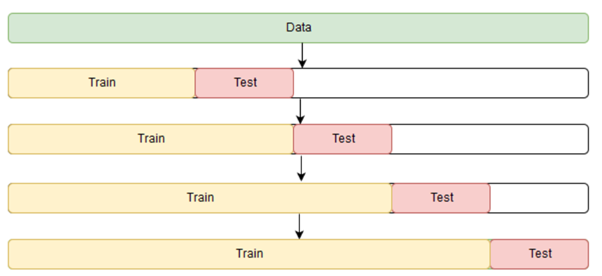

Можно строить прогноз на 1 шаг вперед и считать метрику между получившимися прогнозами и фактом. Здесь можно считать любую метрику, которая нам понятна и нужна (например, MAE)

Также можно обучать не на всех данных, а на каком-то окне (на последних 10 значениях, например).

## Задача

Реализовать кросс-валидацию для временного ряда, прогнозируя на один шаг вперед. Оценить точность модели.

In [20]:
# Ваш код здесь


## Многомерные временные ряды

Есть аналог модели AR для многомерных временных рядов - модель VAR. Подробнее - [тут](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/)


## Прогнозирование временных рядов с использованием других моделей

Прогнозирование временных рядов можно интерпретировать как задачу регрессии, поэтому можно использовать все модели, которые мы изучали до этого.

Чтобы решить задачу регрессии, нужно определить $X$ и $Y$

Чтобы построить матрицу $X$, нужно немного преобразовать датасет. Будем идти скользящим окном размера $k$ по исходному ряду и каждый шаг сохранять в матрицу $X$, а следующее значение записывать в $Y$.

Таким образом, модель будет пытаться предсказать новое значение на основе $k$ предыдущих.

## Задача

Применить `RandomForestRegressor` к датасету с погодой. Подобрать гиперпараметры. Применить кросс-валидацию, сравнить с ARIMA.

## Сглаживание временных рядов

Если во временном ряде есть выбросы, то лучше их убрать. Это можно сделать при помощи фильтров.

Есть четыре основных фильтра:

- Скользящая средняя - считает среднее для скользящего окна из $n$ элементов
- Медианный фильтр - аналогично, только считает медиану
- Фильтр Фурье
- Вейвлет-фильтр

In [21]:
from scipy.signal import medfilt

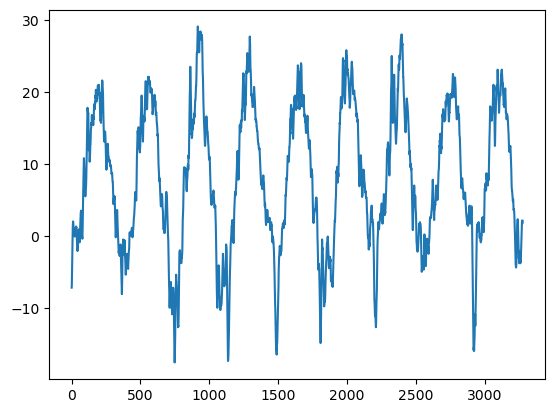

In [22]:
x = df['t']
N = 10
x_filtered = np.convolve(x, np.ones(N)/N, mode='valid')
plt.plot(x_filtered)

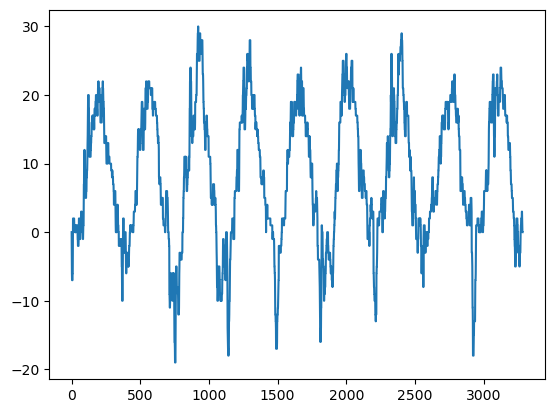

In [23]:
N = 9
x_filtered = medfilt(x, N)
plt.plot(x_filtered)

## Задача

Сравнить качество прогноза на любом из отфильтрованных рядов и на исходных.

**Внимание:** качество всегда сравнивается на исходных данных

In [24]:
# Ваш код здесь


## Задача

Сравнить лучшую модель с бейзлайнами:

1) Прогноз на следующий день = температура сегодня
2) Прогноз на следующий день = температура в этот день год назад
3) Прогноз на следующий день = средняя температура в этот день в прошлые года

In [25]:
# Ваш код здесь
